# Process births data

Before running the command to fetch the dataset, I had to do this:

In [1]:
# https://stackoverflow.com/a/56230607
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from pathlib import Path
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# This command needed the SSL fix above.
df = pd.read_csv('https://github.com/HwaiTengTeoh/Newborns-Weight-Prediction/raw/refs/heads/main/data/2008_births.zip')
df.head()

,INST,RPLACE,RCOUNTY,PLURAL,BDATE,BMONTH,BDAY,BYEAR,SEX,RACE,...,MOTHERTR,IANEMIA,BINJURY,FAS,HYALINE,ASPIRATE,VENTLESS,VENTMORE,ISEIZURE,OTHINF
0,1,6800,68,1,2008-01-01,1,1,2008,2,1,...,2,0,0,0,0,0,0,0,0,0
1,1,160,1,1,2008-01-02,1,2,2008,2,2,...,2,0,0,0,0,0,0,0,0,0
2,1,190,1,1,2008-01-02,1,2,2008,1,1,...,2,0,0,0,0,0,0,0,0,0
3,1,4100,41,1,2008-01-03,1,3,2008,2,1,...,2,0,0,0,0,0,0,0,0,0
4,1,160,1,1,2008-01-03,1,3,2008,2,1,...,2,0,0,0,0,0,0,0,0,0


Assume, for our purposes, and columns of interest, that all 99 values are labels for missing values:

In [4]:
# Copy to defragment the data frame, for performance.
df_nan = df.replace(99, np.nan).copy()

See the file `original/data_description.txt` for column definitions.

In [5]:
# Convert pounds and ounces to kilograms.
df_nan['birth_weight'] = (df_nan['BPOUND'] * sp.constants.lb +
                          df_nan['BOUNCE'] * sp.constants.oz).round(3)

In [6]:
# Copy and rename columns
out = (df_nan[['SEX', 'WEEKS', 'CIGNUM', 'DRINKNUM', 'birth_weight']].
       rename(columns={'SEX': 'sex',
                       'WEEKS': 'gestation_weeks',
                       'CIGNUM': 'mother_daily_cig_num',
                       'DRINKNUM': 'mother_daily_drink_num'}))
out

,sex,gestation_weeks,mother_daily_cig_num,mother_daily_drink_num,birth_weight
0,2,35.0,0.0,0.0,1.843
1,2,40.0,0.0,0.0,3.714
2,1,36.0,0.0,0.0,4.082
3,2,38.0,0.0,0.0,3.345
4,2,42.0,0.0,0.0,4.281
...,...,...,...,...,...
133417,1,34.0,0.0,NaN,2.948
133418,2,40.0,0.0,NaN,4.139
133419,1,41.0,0.0,NaN,3.827
133420,2,39.0,98.0,NaN,2.637


There are a few missing values in gestation length, cigarette and drink numbers.

In [7]:
out.count() / len(out)

sex                       1.000000
gestation_weeks           0.999355
mother_daily_cig_num      0.998628
mother_daily_drink_num    0.993727
birth_weight              0.999715
dtype: float64

These missing values seem rare enough that dropping the missing values will have very little effect.

In [8]:
out = out.dropna()

In [9]:
out_dir = Path('processed')
if not out_dir.is_dir():
    out_dir.mkdir()
out.to_csv(out_dir / 'birth_weights.csv', index=None)

Review the histogram.

array([[<Axes: title={'center': 'birth_weight'}>]], dtype=object)

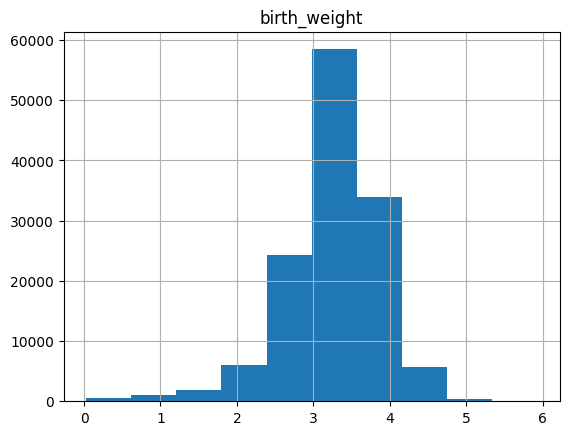

In [10]:
out.hist('birth_weight')